In [1]:
# 世界标准时间数据
from obspy.core import UTCDateTime
print(UTCDateTime("2012-09-07T12:15:00"))
print(UTCDateTime(2012, 9, 7, 12, 15, 0))
print(UTCDateTime(1347020100.0))
print(UTCDateTime("2012-09-07T12:15:00+02:00"))
time = UTCDateTime("2012-09-07T12:15:00")
print(time.year)
print(time.julday)
print(time.timestamp)
print(time.weekday)

2012-09-07T12:15:00.000000Z
2012-09-07T12:15:00.000000Z
2012-09-07T12:15:00.000000Z
2012-09-07T10:15:00.000000Z
2012
251
1347020100.0
4


1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples
1
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples
         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})
RJOB
CM6
[-38  12  -4 ... -14  -3  -9]
[-38  12  -4]
36000


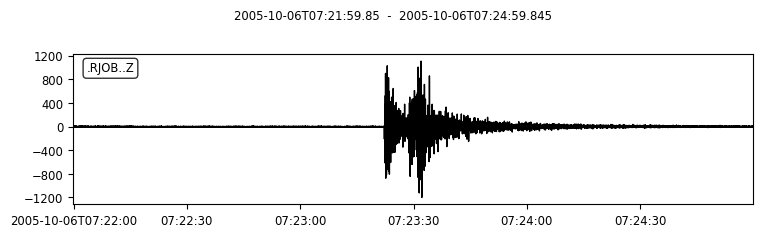

i:\TGY-being\project\python\obspy_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


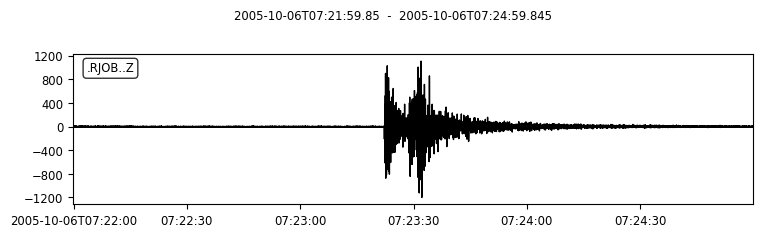

In [2]:
# 读取地震数据
from obspy import read
st = read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')
print(st)
print(len(st))
tr = st[0] # assign first and only trace to new variable
print(tr)

## 访问元信息
print(tr.stats)
print(tr.stats.station)
print(tr.stats.gse2.datatype)

## 访问波形数据
print(tr.data)
print(tr.data[0:3])
print(len(tr))

## 数据浏览
st.plot()


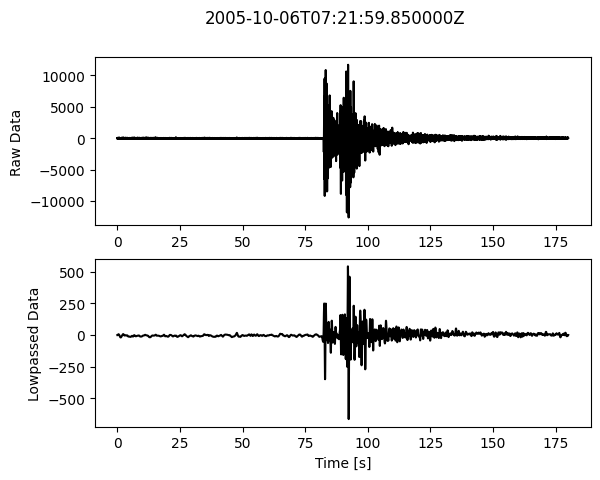

In [12]:
# Filtering Seismograms（滤波）
## 以下脚本展示了如何对一个地震记录进行滤波。示例使用一个零相移低通（1Hz）滤波器处理波形。可用的滤波器有：带通，带阻，低通，高通
import numpy as np
import matplotlib.pyplot as plt
import obspy
# Read the seismogram
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
# There is only one trace in the Stream object, let’s work on that trace...
tr = st[0]
# Filtering with a lowpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=1.0, corners=2, zerophase=True)
# Now let’s plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)

plt.plot(t, tr.data, 'k')
 
plt.ylabel('Raw Data')
 
plt.subplot(212)
 
plt.plot(t, tr_filt.data, 'k')
 
plt.ylabel('Lowpassed Data')
 
plt.xlabel('Time [s]')
 
plt.suptitle(tr.stats.starttime)
 
plt.show()

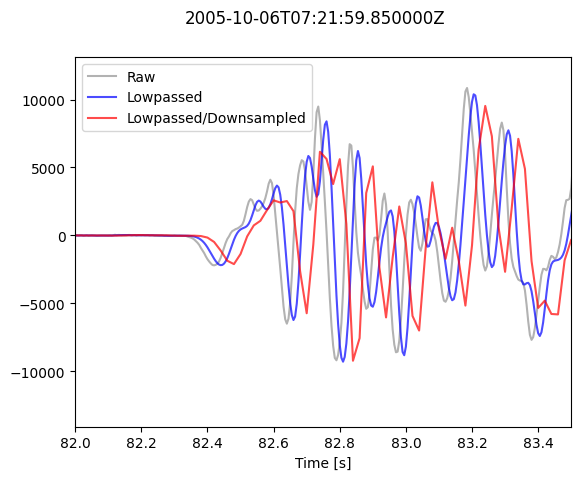

In [13]:
# 下采样
import numpy as np
 
import matplotlib.pyplot as plt
 
import obspy
 
# Read the seismogram
 
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
 
# There is only one trace in the Stream object, let’s work on that trace...
 
tr = st[0]
 
# Decimate the 200 Hz data by a factor of 4 to 50 Hz. Note that this
 
# automatically includes a lowpass filtering with corner frequency 20 Hz.
 
# We work on a copy of the original data just to demonstrate the effects of
 
# downsampling.
 
tr_new = tr.copy()
 
tr_new.decimate(factor=4, strict_length=False)
 
# For comparison also only filter the original data (same filter options as in
 
# automatically applied filtering during downsampling, corner frequency
 
# 0.4 * new sampling rate)
 
tr_filt = tr.copy()
 
tr_filt.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0)
 
# Now let’s plot the raw and filtered data...
 
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
 
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate,tr_new.stats.delta)
 
plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
 
plt.plot(t, tr_filt.data, 'b', label='Lowpassed', alpha=0.7)
 
plt.plot(t_new, tr_new.data, 'r', label='Lowpassed/Downsampled', alpha=0.7)
 
plt.xlabel('Time [s]')
 
plt.xlim(82, 83.5)
 
plt.suptitle(tr.stats.starttime)
 
plt.legend()
 
plt.show()

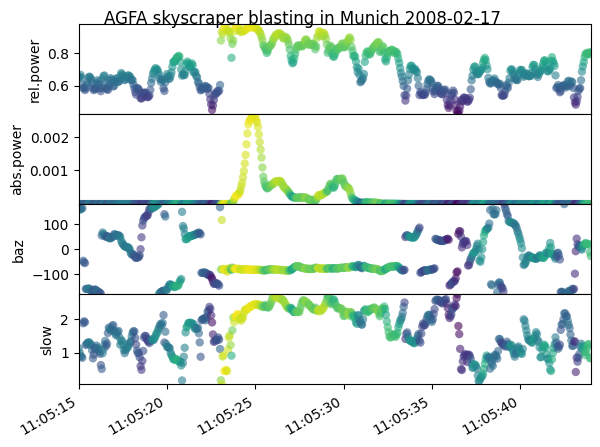

In [15]:
# FK分析
import matplotlib.pyplot as plt
 
import matplotlib.dates as mdates
 
 
 
import obspy
 
from obspy.core.util import AttribDict
 
from obspy.imaging.cm import obspy_sequential
 
from obspy.signal.invsim import corn_freq_2_paz
 
from obspy.signal.array_analysis import array_processing
 
 
 
 
 
# Load data
 
st = obspy.read("https://examples.obspy.org/agfa.mseed")
 
 
 
# Set PAZ and coordinates for all 5 channels
 
st[0].stats.paz = AttribDict({
 
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
 
    'zeros': [0j, 0j],
 
    'sensitivity': 205479446.68601453,
 
    'gain': 1.0})
 
st[0].stats.coordinates = AttribDict({
 
    'latitude': 48.108589,
 
    'elevation': 0.450000,
 
    'longitude': 11.582967})
 
 
 
st[1].stats.paz = AttribDict({
 
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
 
    'zeros': [0j, 0j],
 
    'sensitivity': 205479446.68601453,
 
    'gain': 1.0})
 
st[1].stats.coordinates = AttribDict({
 
    'latitude': 48.108192,
 
    'elevation': 0.450000,
 
    'longitude': 11.583120})
 
 
 
st[2].stats.paz = AttribDict({
 
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
 
    'zeros': [0j, 0j],
 
    'sensitivity': 250000000.0,
 
    'gain': 1.0})
 
st[2].stats.coordinates = AttribDict({
 
    'latitude': 48.108692,
 
    'elevation': 0.450000,
 
    'longitude': 11.583414})
 
 
 
st[3].stats.paz = AttribDict({
 
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j)],
 
    'zeros': [0j, 0j],
 
    'sensitivity': 222222228.10910088,
 
    'gain': 1.0})
 
st[3].stats.coordinates = AttribDict({
 
    'latitude': 48.108456,
 
    'elevation': 0.450000,
 
    'longitude': 11.583049})
 
 
 
st[4].stats.paz = AttribDict({
 
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j), (-2.105 + 0j)],
 
    'zeros': [0j, 0j, 0j],
 
    'sensitivity': 222222228.10910088,
 
    'gain': 1.0})
 
st[4].stats.coordinates = AttribDict({
 
    'latitude': 48.108730,
 
    'elevation': 0.450000,
 
    'longitude': 11.583157})
 
 
 
 
 
# Instrument correction to 1Hz corner frequency
 
paz1hz = corn_freq_2_paz(1.0, damp=0.707)
 
st.simulate(paz_remove='self', paz_simulate=paz1hz)
 
 
 
# Execute array_processing
 
stime = obspy.UTCDateTime("20080217110515")
 
etime = obspy.UTCDateTime("20080217110545")
 
kwargs = dict(
 
    # slowness grid: X min, X max, Y min, Y max, Slow Step
 
    sll_x=-3.0, slm_x=3.0, sll_y=-3.0, slm_y=3.0, sl_s=0.03,
 
    # sliding window properties
 
    win_len=1.0, win_frac=0.05,
 
    # frequency properties
 
    frqlow=1.0, frqhigh=8.0, prewhiten=0,
 
    # restrict output
 
    semb_thres=-1e9, vel_thres=-1e9, timestamp='mlabday',
 
    stime=stime, etime=etime
 
)
 
out = array_processing(st, **kwargs)
 
 
 
# Plot
 
labels = ['rel.power', 'abs.power', 'baz', 'slow']
 
 
 
xlocator = mdates.AutoDateLocator()
 
fig = plt.figure()
 
for i, lab in enumerate(labels):
 
    ax = fig.add_subplot(4, 1, i + 1)
 
    ax.scatter(out[:, 0], out[:, i + 1], c=out[:, 1],alpha=0.6,
 
               edgecolors='none', cmap=obspy_sequential)
 
    ax.set_ylabel(lab)
 
    ax.set_xlim(out[0, 0], out[-1, 0])
 
    ax.set_ylim(out[:, i + 1].min(), out[:, i + 1].max())
 
    ax.xaxis.set_major_locator(xlocator)
 
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(xlocator))
 
 
 
fig.suptitle('AGFA skyscraper blasting in Munich %s' % (
 
    stime.strftime('%Y-%m-%d'), ))
 
fig.autofmt_xdate()
 
fig.subplots_adjust(left=0.15, top=0.95, right=0.95, bottom=0.2, hspace=0)
 
plt.show()

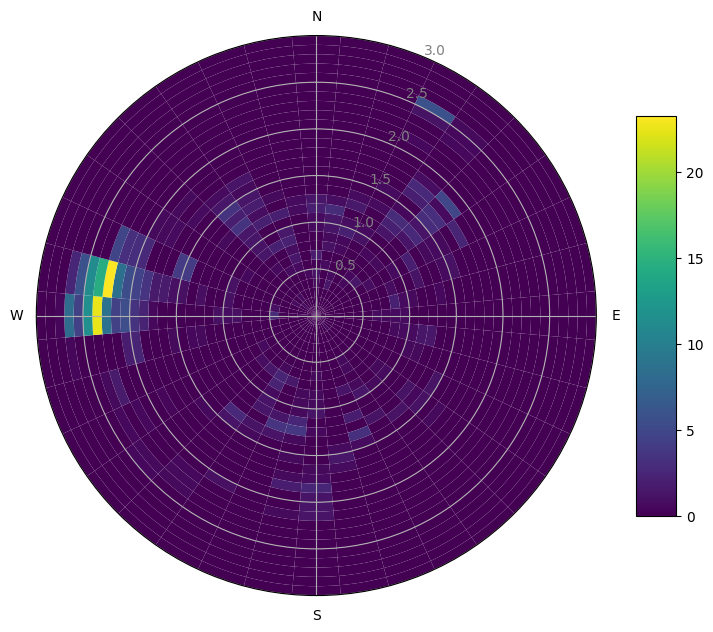

In [19]:
# 坐标图表示
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize
 
import obspy
from obspy.core.util import AttribDict
from obspy.imaging.cm import obspy_sequential
from obspy.signal.invsim import corn_freq_2_paz
from obspy.signal.array_analysis import array_processing
# Load data
st = obspy.read("https://examples.obspy.org/agfa.mseed")
 
# Set PAZ and coordinates for all 5 channels
st[0].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 205479446.68601453,
    'gain': 1.0})
st[0].stats.coordinates = AttribDict({
    'latitude': 48.108589,
    'elevation': 0.450000,
    'longitude': 11.582967})
 
st[1].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 205479446.68601453,
    'gain': 1.0})
 
st[1].stats.coordinates = AttribDict({
    'latitude': 48.108192,
    'elevation': 0.450000,
    'longitude': 11.583120})

st[2].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 250000000.0,
    'gain': 1.0})
 
st[2].stats.coordinates = AttribDict({
    'latitude': 48.108692,
    'elevation': 0.450000,
    'longitude': 11.583414})

st[3].stats.paz = AttribDict({
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j)],
    'zeros': [0j, 0j],
    'sensitivity': 222222228.10910088,
    'gain': 1.0})
 
st[3].stats.coordinates = AttribDict({
    'latitude': 48.108456,
    'elevation': 0.450000,
    'longitude': 11.583049})

st[4].stats.paz = AttribDict({
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j), (-2.105 + 0j)],
    'zeros': [0j, 0j, 0j],
    'sensitivity': 222222228.10910088,
    'gain': 1.0})
 
st[4].stats.coordinates = AttribDict({
    'latitude': 48.108730,
    'elevation': 0.450000,
    'longitude': 11.583157})

# Instrument correction to 1Hz corner frequency
paz1hz = corn_freq_2_paz(1.0, damp=0.707)
st.simulate(paz_remove='self', paz_simulate=paz1hz)

# Execute array_processing
kwargs = dict(
    sll_x=-3.0, slm_x=3.0, sll_y=-3.0, slm_y=3.0, sl_s=0.03,
    # sliding window properties
    win_len=1.0, win_frac=0.05,
    # frequency properties
    frqlow=1.0, frqhigh=8.0, prewhiten=0,
    # restrict output
    semb_thres=-1e9, vel_thres=-1e9,
    stime=obspy.UTCDateTime("20080217110515"),
    etime=obspy.UTCDateTime("20080217110545")
)

out = array_processing(st, **kwargs)
# Plot
cmap = obspy_sequential
 
# make output human readable, adjust backazimuth to values between 0 and 360
t, rel_power, abs_power, baz, slow = out.T
baz[baz < 0.0] += 360
 
# choose number of fractions in plot (desirably 360 degree/N is an integer!)
N = 36
N2 = 30
abins = np.arange(N + 1) * 360. / N
sbins = np.linspace(0, 3, N2 + 1)

# sum rel power in bins given by abins and sbins
hist, baz_edges, sl_edges = np.histogram2d(baz, slow, bins=[abins, sbins], weights=rel_power)
# transform to radian
baz_edges = np.radians(baz_edges)
 
# add polar and colorbar axes
fig = plt.figure(figsize=(8, 8))
cax = fig.add_axes([0.85, 0.2, 0.05, 0.5])
ax = fig.add_axes([0.10, 0.1, 0.70, 0.7], polar=True)
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

dh = abs(sl_edges[1] - sl_edges[0])
dw = abs(baz_edges[1] - baz_edges[0])

# circle through backazimuth
for i, row in enumerate(hist):
    bars = ax.bar(x=(i * dw) * np.ones(N2),height=dh * np.ones(N2),width=dw, bottom=dh * np.arange(N2),color=cmap(row / hist.max()))

ax.set_xticks(np.linspace(0, 2 * np.pi, 4, endpoint=False))
ax.set_xticklabels(['N', 'E', 'S', 'W'])

# set slowness limits
ax.set_ylim(0, 3)
[i.set_color('grey') for i in ax.get_yticklabels()]
ColorbarBase(cax, cmap=cmap,norm=Normalize(vmin=hist.min(), vmax=hist.max()))
plt.show()

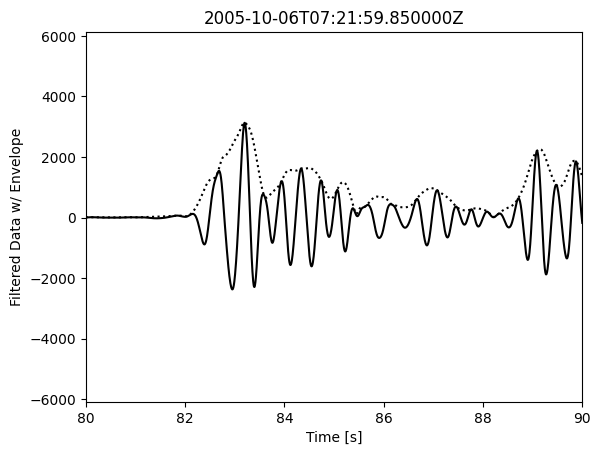

In [20]:
# 信号包络
import numpy as np
 
import matplotlib.pyplot as plt
 
 
 
import obspy
 
import obspy.signal
 
 
 
 
 
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
 
data = st[0].data
 
npts = st[0].stats.npts
 
samprate = st[0].stats.sampling_rate
 
 
 
# Filtering the Stream object
 
st_filt = st.copy()
 
st_filt.filter('bandpass', freqmin=1, freqmax=3, corners=2, zerophase=True)
 
 
 
# Envelope of filtered data
 
data_envelope = obspy.signal.filter.envelope(st_filt[0].data)
 
 
 
# The plotting, plain matplotlib
 
t = np.arange(0, npts / samprate, 1 / samprate)
 
plt.plot(t, st_filt[0].data, 'k')
 
plt.plot(t, data_envelope, 'k:')
 
plt.title(st[0].stats.starttime)
 
plt.ylabel('Filtered Data w/ Envelope')
 
plt.xlabel('Time [s]')
 
plt.xlim(80, 90)
 
plt.show()